In [ ]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

# Downloading all the configuration files

In [ ]:
# Downloading the atomic data
download_atom_data('kurucz_cd23_chianti_H_He')

In [ ]:
# Downloading the setup configuration
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis-setups/master/2020/2020_williamson_94I/he_setups/22d_he_01.yml

In [ ]:
# Downloading the model configuration
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis-setups/master/2020/2020_williamson_94I/he_setups/22d_He_0.01.csvy

# Running the model spectrum

In [ ]:
sim = run_tardis('22d_he_01.yml')

[tardis.model.base   ][WARNING]  Abundances have not been normalized to 1. - normalizing (base.py:601)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[py.warnings         ][WARNING]  /home/arib/anaconda3/envs/tardis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:109)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:170)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:176)
[tardis.plasma.properties.atomic][WARNING]  Zeta_data missing - replaced with 1s. Missing ions: [(11, 12), (12, 13), (14, 15), (16, 17), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (26, 27), (27, 28), (28, 29)] (atomic.py:255)
[tardi

# Acquiring the spectrum from the simulation

In [ ]:
spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_reabsorbed = sim.runner.spectrum_reabsorbed

# Plotting the spectrum in different modes

Populating the interactive namespace from numpy and matplotlib


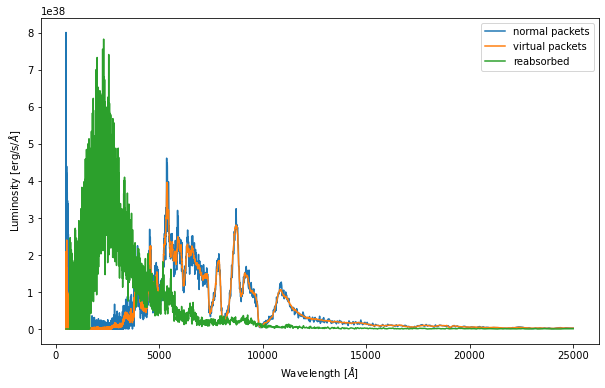

In [ ]:
%pylab inline

figure(figsize=(10,6))
plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_reabsorbed.luminosity_density_lambda, label='reabsorbed')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
# xlim(3000, 9000)

# Visualizing the SDEC Plot in 'real' mode

In [ ]:
from tardis.visualization import SDECPlotter

In [ ]:
plotter = SDECPlotter.from_simulation(sim)

<AxesSubplot:xlabel='Wavelength $[\\mathrm{\\AA}]$', ylabel='$L_{\\lambda}$ [erg $\\mathrm{s^{-1}}$ $\\mathrm{\\AA^{-1}}$]'>

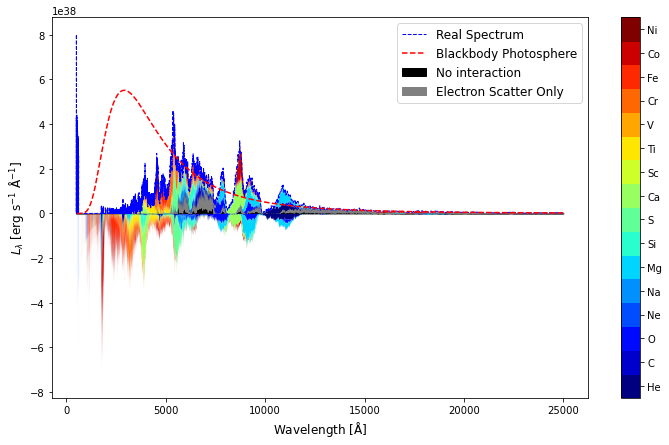

In [ ]:
plotter.generate_plot_mpl("real")